# Dean Property Consulting 2024

## EDA

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Begin EDA

In [2]:
# global variables for the visualizations
color='coral'
figsize=(7.5,7.5)

In [3]:
# read in dataset
df=pd.read_csv('../data/230000 RE Transfers 2010-2023 PROGRESS SORTED 2.csv',low_memory=False)

In [4]:
# peek at a sample
df.sample(5)

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
36758,NaN,09/28/2022,NaN,NaN,NaN,NaN,"$1,810,000.00","116 Second Pl #3, Brooklyn, 11231",NaN,1,...,NaN,NaN,NaN,NaN,PropertyShark,NaN,NaN,"$90,415.00",6.66%,NaN
7077,NaN,12/30/2014,NaN,102,Suydam St,11221,"$1,250,000.00",NaN,NaN,1,...,NaN,NaN,NaN,12,PropertyShark,NaN,NaN,"$38,184.00",3.97%,C2-3/R6
6262,NaN,10/02/2014,NaN,300,15th St,11215,"$1,100,000.00",NaN,NaN,3,...,NaN,NaN,NaN,12,PropertyShark,NaN,NaN,"$36,037.00",4.27%,NaN
40180,NaN,10/12/2023,NaN,NaN,NaN,NaN,"$365,000.00","590 Parkside Ave #E 2E, Brooklyn, 11226",NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$20,549.00",7.57%,"R6, C2-3"
38082,NaN,02/17/2023,NaN,NaN,NaN,NaN,"$925,000.00","229 Hart St, Brooklyn, 11206",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$43,988.00",6.32%,R6B


In [26]:
# quick statistical information
df['DATE'].describe()

count          40684
unique          2914
top       01/12/2012
freq              97
Name: DATE, dtype: object

In [27]:
# curious about the Unnamed column
df['Unnamed: 0'].value_counts()

A    78
O    50
P    45
X    11
C     3
Name: Unnamed: 0, dtype: int64

The `Unnamed` column is something to talk about with the client as it may represent domain-specific knowledge.

In [28]:
df['SALE / ASK'].describe()

count             40682
unique             5593
top       $1,200,000.00
freq                613
Name: SALE / ASK, dtype: object

In [29]:
df['SALE / ASK'].value_counts()

$1,200,000.00    613
$1,300,000.00    558
$1,100,000.00    525
$1,250,000.00    434
$950,000.00      431
                ... 
$1,537,609.00      1
$1,494,000.00      1
$415,200.00        1
$6,129,000.00      1
$1,366,000.00      1
Name: SALE / ASK, Length: 5593, dtype: int64

In [30]:
# determine the number of nulls in the dataset

(df['SALE / ASK'].isna().sum()/df['SALE / ASK'].count())*100

0.02212280615505629

In [31]:
df[df['SALE / ASK'].isnull()]

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
13579,X,08/21/2016,Fort Greene,111,Vanderbilt Ave,NaN,NaN,NaN,NaN,1,...,"$6,348.00",2,1.5,10,PropertyShark,NaN,Douglas Elliman,"$13,356.00",3.43%,NaN
13654,X,08/28/2016,Downtown Brooklyn,388,Bridge St,NaN,NaN,NaN,NaN,1,...,$972.00,3,2.0,2,PropertyShark,NaN,Halstead,"$21,888.00",3.43%,NaN
40684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN


There are two sale prices missing. Out of the entire dataset, that equates to 0.0049% of the entire dataset.

In [32]:
# define the two rows
rows_to_remove = [13579, 13654]

# drop the two rows
df.drop(rows_to_remove, inplace=True)

# check work
df[df['SALE / ASK'].isnull()]

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
40684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN


Let's plot the distribution of sale prices.

#### Visualization of `Sale/Ask` Prices

In [35]:
# explore bin sizes

bin_number=10

# extract column
data = df['SALE / ASK']

# Compute the histogram with bin_number (10) bins
hist, bin_edges = np.histogram(data, bins=bin_number)

# The bin_edges variable contains the edges of the bins
bin_categories = [(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)]
print(bin_categories)

TypeError: '<=' not supported between instances of 'str' and 'float'

TypeError: 'value' must be an instance of str or bytes, not a float

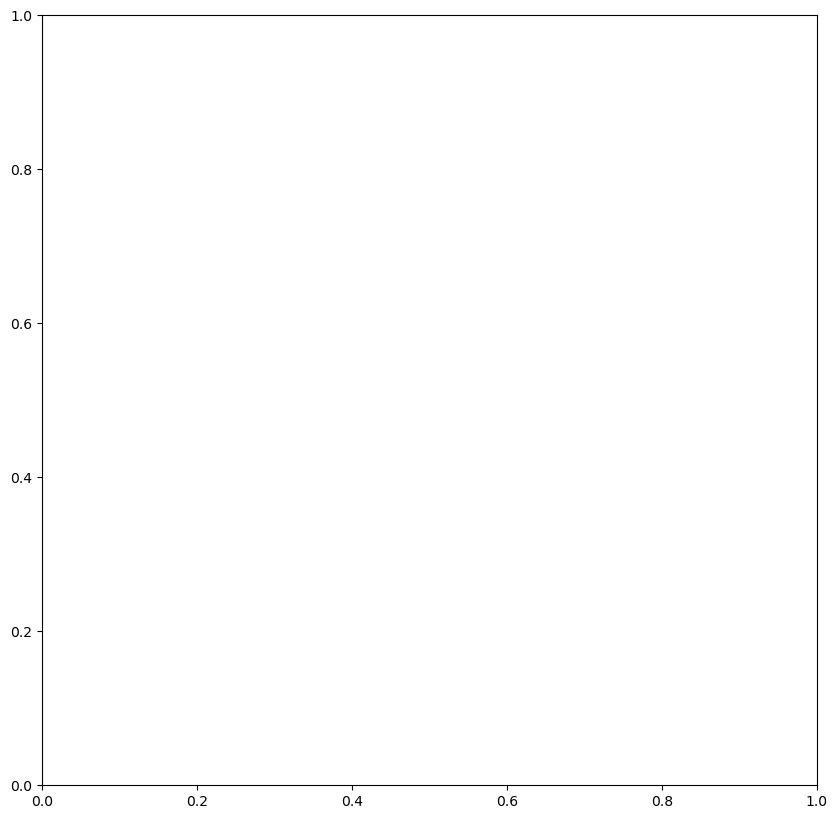

In [34]:
plt.figure(figsize=(10,10))
plt.hist(df['SALE / ASK'], 
         bins=20, 
         color='coral',
         edgecolor='black')
plt.xticks()
plt.xlabel('Price/Ask')
plt.ylabel('Count')
plt.title('Histogram of Sale/Ask Prices ($)')
plt.show()

The vast majority of the sales are below $10,000,000.

In [36]:
.1e8

10000000.0

What about for sales below $10,000,000?

In [37]:
# filter the dataset
b10m=df[df['SALE / ASK']<1e7]

# check
b10m['SALE / ASK'].describe()

TypeError: '<' not supported between instances of 'str' and 'float'

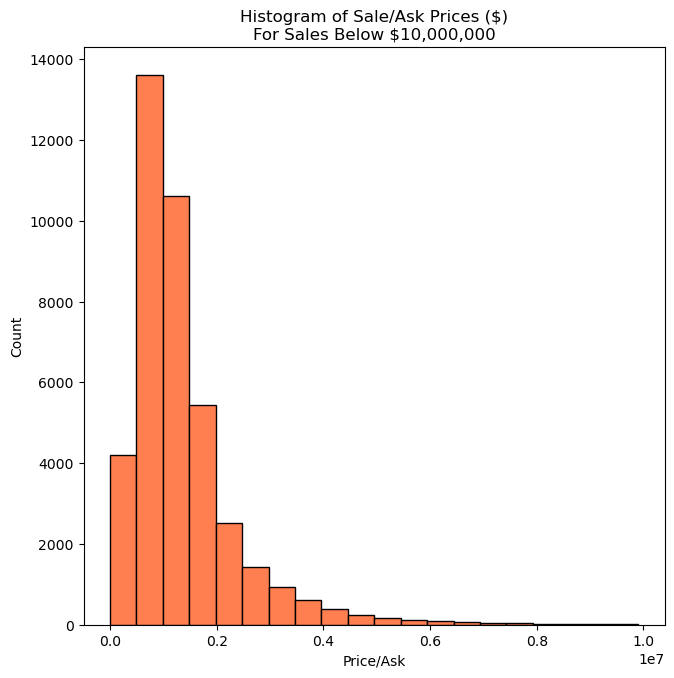

In [21]:
plt.figure(figsize=figsize)
plt.hist(b10m['SALE / ASK'], 
         bins=20, 
         color=color,
         edgecolor='black')
# plt.xticks(ticks=[0,'2,000,000','4,000,000','6,000,000','8,000,000','10,000,000'])
plt.xlabel('Price/Ask')
plt.ylabel('Count')
plt.title('Histogram of Sale/Ask Prices ($)\nFor Sales Below $10,000,000')
plt.savefig('../figs/hist_salesbelow1e7.pdf',bbox_inches='tight')
plt.savefig('../figs/hist_salesbelow1e7.png',bbox_inches='tight')
plt.show()

#### Visualization of other categories

Let's do some more visualizations. But first, we'll look at the whole table again.

In [38]:
df.head(3)

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
0,NaN,01/03/2010,Ditmas Park,657,East 24th St,NaN,"$770,000.00",NaN,NaN,1,...,"3,753",6,3.0,12,NYTimes,NaN,Coldwell Banker Residential,"$36,033.00",5.53%,NaN
1,NaN,01/06/2010,Boerum Hill,229,Dean St,NaN,"$1,397,478.00",NaN,NaN,2,...,"4,617",4,2.0,12,Brownstoner,NaN,NaN,"$63,202.00",5.53%,NaN
2,NaN,01/10/2010,Brooklyn Heights,38,Livingston St,NaN,"$505,000.00",NaN,NaN,1,...,1,1,1.0,2,NYTimes,NaN,Brooklyn Heights Real Estate,"$30,089.00",5.61%,NaN


We need to confirm that the rest of the dataset is in appropriate datatypes.

In [39]:
# list all the columns and their description
for col in df.columns:
    print(f'''
{col}\n
{df[col].describe()}\n
{df[col].sample(3)}\n
**********
    ''')


Unnamed: 0

count     185
unique      5
top         A
freq       78
Name: Unnamed: 0, dtype: object

997      NaN
6143     NaN
38648    NaN
Name: Unnamed: 0, dtype: object

**********
    

DATE

count          40682
unique          2912
top       01/12/2012
freq              97
Name: DATE, dtype: object

26244    03/04/2020
30520    06/07/2021
19067    01/30/2018
Name: DATE, dtype: object

**********
    

NEIGBORHOOD

count           1751
unique            54
top       Park Slope
freq             315
Name: NEIGBORHOOD, dtype: object

38433    NaN
25975    NaN
24324    NaN
Name: NEIGBORHOOD, dtype: object

**********
    

No.

count     33733
unique     3796
top         111
freq        104
Name: No., dtype: object

29691    318
12319     39
11592    229
Name: No., dtype: object

**********
    

STREET

count             33733
unique              914
top       Jefferson Ave
freq                394
Name: STREET, dtype: object

35774           NaN
16168    Putnam Ave
2718      Monroe 

TypeError: 'value' must be an instance of str or bytes, not a float

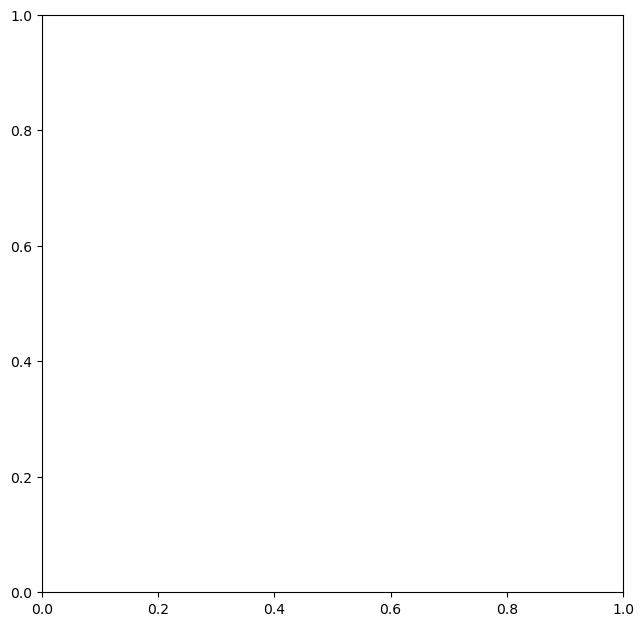

In [28]:
plt.figure(figsize=figsize)
plt.scatter(x=df['UNITS'],
           y=df['FLOORS'])
plt.title('Units vs Floors')
plt.xlabel('Units')
plt.ylabel('Floors')
plt.show()

Next plot example is below:

In [ ]:
# make a bar plot for all but location

plt.subplots(5,2,figsize = (15,15))

for index, col in enumerate(df.select_dtypes('object').columns[:-1]):
    
    plt.subplot(5,2,index + 1)
    df[col].value_counts().sort_values(ascending = False).plot(kind = 'barh',color = 'cornflowerblue')
    plt.title(f"row count {col} status")
    

plt.tight_layout()
plt.show()